In [1]:
#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from gurobipy import *
from scipy.spatial.distance import cdist, euclidean
from scipy.stats import truncnorm
from scipy.sparse import csr_matrix
from time import time

In [2]:
path = "C:/Users/a.rojasa55/OneDrive - Universidad de los Andes/Documentos/MOPTA-23/Data/"
#path = "C:/Users/ari_r/OneDrive - Universidad de los Andes/Documentos/MOPTA-23/Data/"
vehicles = pd.read_csv(path+'MOPTA2023_car_locations.csv', sep = ',', header = None)


In [48]:
stations = pd.read_csv(path+"fuel_stations.csv")

northern = (-79.761960, 42.269385)
southern = (-76.9909,39.7198)
western = (-80.519400, 40.639400)
eastern = (-74.689603, 41.363559)

stations_loc = stations[["Longitude","Latitude"]]
stations_loc["Latitude"] = (stations["Latitude"]-southern[1])*69
stations_loc["Longitude"] = (stations["Longitude"]-western[0])*52-1

#stations = stations_loc[(stations_loc["Longitude"] <= 290) & (stations_loc["Latitude"] <= 150)]
stations.rename(columns={"Longitude": 0, "Latitude":1}, inplace=True)

C:\Users\a.rojasa55\AppData\Local\Temp\ipykernel_3948\774016208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_loc["Latitude"] = (stations["Latitude"]-southern[1])*69
C:\Users\a.rojasa55\AppData\Local\Temp\ipykernel_3948\774016208.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_loc["Longitude"] = (stations["Longitude"]-western[0])*52-1


In [50]:
stations.to_csv(path+"Definite Stations.csv")

[]

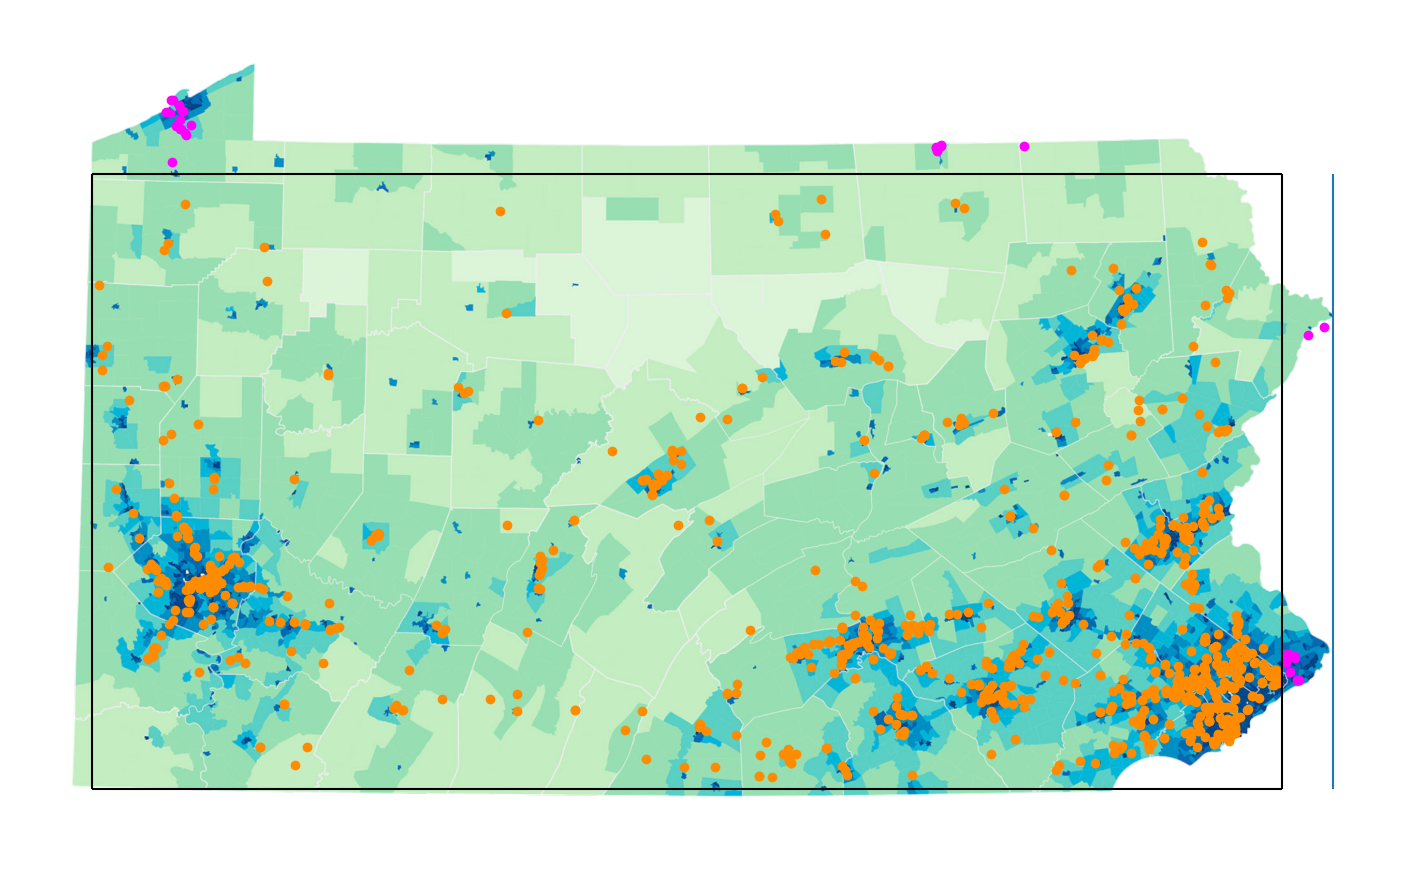

In [49]:
img = plt.imread("./Problem Visualization/Pennsylvania_Population.png")
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,12))


'''for v in vehicles.index:
        x_v = vehicles.loc[v,0]; y_v = vehicles.loc[v,1]
        ax.plot(x_v,y_v,marker="o",color="darkgreen")'''

oor = 0
for v in stations.index:
        x_v = stations_loc.loc[v,"Longitude"]; y_v = stations_loc.loc[v,"Latitude"]
        if x_v > 290 or y_v > 150: col= "magenta"; oor += 1
        else: col = "darkorange"
        ax.plot(x_v,y_v,marker="o",color=col)

ax.vlines(x=[0,290],ymin=0,ymax=150,color="black")
ax.hlines(y=[0,150],xmin=0,xmax=290,color="black")



#ax.plot((southern[0]-western[0])*53,0,marker="o",color="goldenrod")
#ax.plot((northern[0]-western[0])*53,(northern[1]-southern[1])*69*165/178,marker="o",color="goldenrod")
#ax.plot(0,(western[1]-southern[1])*69*165/178,marker="o",color="goldenrod")
#ax.plot((eastern[0]-western[0])*53,(eastern[1]-southern[1])*69*165/178,marker="o",color="goldenrod")

#ax.plot(-30,-30,marker="o",linestyle="",color="magenta",label="Out-of-range Stations")
#ax.plot(-30,-30,marker="o",linestyle="",color="darkorange",label="Within-range Stations")
#ax.plot(-30,-30,marker="o",linestyle="",color="darkgreen",label="Vehicles")

ax.spines[["top","bottom","left","right"]].set_visible(False)

#ax.imshow(img, extent=[-5, 308, -5, 178])
zero = (-5,-5)
height = 184.425
#height = 177.1875
ax.vlines(x=[zero[0]+height*5/3],ymin=0,ymax=150)
#ax.vlines(x=[zero[0]+295.3125],ymin=0,ymax=150)
ax.imshow(img, extent=[zero[0], zero[0]+height*5/3, zero[1], zero[1]+height])
#ax.legend(loc="upper right")
ax.set_xlim(-20,320)
ax.set_ylim(-20,190)
ax.set_xticks([]); ax.set_yticks([])
#ax.set_title("Charging Stations and Vehicles locations")

#plt.savefig("./Problem Visualization/Vehicles+Stations map",dpi=300,transparent=True)


C:\Users\ari_r\AppData\Local\Temp\ipykernel_23596\3534894385.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot((x), norm.pdf(x),'r-', lw=2, alpha=0.6, label='norm pdf',color="forestgreen")


'betas = [norm.pdf(x) for x in range(101)]\nax.plot([x*rescaling for x in range(101)],betas,color="#8B4513")\nless_than = sum([1 if x*rescaling <= exp_demand else 0 for x in range(101)])\nax.fill_between([exp_demand]+[x*rescaling for x in range(less_than-1,101)],[0 for i in range(less_than-2,101)],[beta.pdf(exp_demand/100,a=beta_p[0],b=beta_p[1])]+[betas[i] for i in range(less_than-1,101)],alpha=0.5,color="#8B4513")\n\nax.set_ylim(0,2.5)'

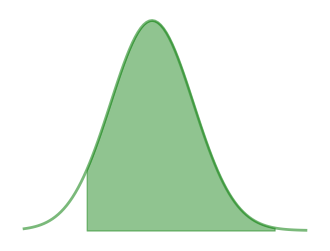

In [34]:
from scipy.stats import norm

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,3))
x = np.linspace(norm.ppf(0.001),
                norm.ppf(0.9999), 100)
ax.plot((x), norm.pdf(x),'r-', lw=2, alpha=0.6, label='norm pdf',color="forestgreen")

ax.fill_between([i for i in x if i >= -1.6 and i <= 3],[0 for i in x if i >= -1.6 and i <= 3],[norm.pdf(i) for i in x if i>=-1.6 and i<=3],alpha=0.5,color="forestgreen")
ax.spines[["top","bottom","left","right"]].set_visible(False)
ax.set_xticks([]); ax.set_yticks([])

'''betas = [norm.pdf(x) for x in range(101)]
ax.plot([x*rescaling for x in range(101)],betas,color="#8B4513")
less_than = sum([1 if x*rescaling <= exp_demand else 0 for x in range(101)])
ax.fill_between([exp_demand]+[x*rescaling for x in range(less_than-1,101)],[0 for i in range(less_than-2,101)],[beta.pdf(exp_demand/100,a=beta_p[0],b=beta_p[1])]+[betas[i] for i in range(less_than-1,101)],alpha=0.5,color="#8B4513")

ax.set_ylim(0,2.5)'''

In [5]:
def feasibility_vehic_to_locations(df_vehic,v,r, df_loc, steps_per_hour, driving_speed, charging_speed, T):
    distances = {s:euclidean((df_vehic.loc[v,0], df_vehic.loc[v,1]), (df_loc.loc[s,0], df_loc.loc[s,1])) for s in range(1,df_loc.shape[0]+1)}
    p = {s:250-(r-distances[s]) for s in range(1,df_loc.shape[0]+1)}
    a = {s:int(distances[s]*steps_per_hour/driving_speed)+1 for s in range(1,df_loc.shape[0]+1)}
    k = {s:int(p[s]*steps_per_hour/charging_speed)+1 for s in range(1,df_loc.shape[0]+1)}
    return sum([1 if r/distances[s] >= 1 and a[s]+k[s]-1<=T[-1] else 0 for s in range(1,df_loc.shape[0]+1)])


def distance_matrix(df1, df2):
    # Extract the x and y coordinates as arrays
    x1 = np.array(df1[0])
    y1 = np.array(df1[1])
    x2 = np.array(df2[0])
    y2 = np.array(df2[1])
    
    # Compute the pairwise distances between the two sets of points
    distances = cdist(np.column_stack((x1, y1)), np.column_stack((x2, y2)))
    
    # Convert the distance matrix to a dictionary
    distance_dict = {}
    for i in range(1,len(df1)+1):
        for j in range(1,len(df2)+1):
            location1 = i
            location2 = j
            distance = distances[i-1,j-1]
            distance_dict[(location1, location2)] = round(distance,2)
            
    return distance_dict

In [6]:
def scheduling(y,V,S,T,p,k,a,r,d,cd,cc,df_vehic,FIFO=0,output=0,write=0,relaxed=0,gap=0.0001):

    def feas(v,s):
        return d[v,s]<=r[v] and a[v,s]+k[v,s]-1<=T[-1] and a[v,s]<=T[-1]

    m = Model("Scheduling")

    # Auxiliar feasibility variable
    z = {(v,0):m.addVar(name=f"z_{v,0}",vtype=GRB.CONTINUOUS,lb=0,ub=1) for v in V}
    S_v = {v:[s for s in S if feas(v,s)] for v in V}
    w, q, g = {}, {}, {}
    for s in S:
        for v in V:
            if s in S_v[v]:
                # If v \in V is assigned to s \in S
                z[v,s] = m.addVar(name=f"z_{v,s}",vtype=GRB.CONTINUOUS,lb=0,ub=1)
                for t in T:
                    if t >= a[v,s]:
                        # If v \in V is charging on s \in S at t \in T
                        q[v,s,t] = m.addVar(name=f"q_{v,s,t}",vtype=GRB.CONTINUOUS,lb=0,ub=1)
                        if t + k[v,s] - 1 <= T[-1]:
                            # If v \in V starts charging on s \in S at t \in T
                            w[v,s,t] = m.addVar(name=f"w_{v,s,t}",vtype=GRB.BINARY)
                            # If v \in V is waiting in line on s \in S at t \in T
                            g[v,s,t] = m.addVar(name=f"g_{v,s,t}",vtype=GRB.CONTINUOUS,lb=0,ub=1)
                        

    # Each vehicle must be assigned to one station
    for v in V:
            m.addConstr(quicksum(z[v,s] for s in S_v[v]+[0]) == 1)
    
    for s in S:

        for t in T:
            # In every station, at every time period, at most y_s vehicles recharging
            m.addConstr(quicksum(q[v,s,t] for v in V if t >= a[v,s] and s in S_v[v]) <= y[s])
            # In every station, at every time period, at most y_s vehicles waiting in line
            m.addConstr(quicksum(g[v,s,t] for v in V if t >= a[v,s] and s in S_v[v] and t + k[v,s] - 1 <= T[-1]) <= y[s])

        if FIFO:
            for v1 in V:
                for v2 in V:
                    if a[v1,s] < a[v2,s] and s in S_v[v1] and s in S_v[v2]:
                        m.addConstr(quicksum(t*w[v1,s,t] for t in T if t >= a[v1,s] and t + k[v1,s] - 1 <= T[-1]) - T[-1]*(1-z[v1,s]) <= quicksum(t*w[v2,s,t] for t in T if t >= a[v2,s] and t + k[v2,s] - 1 <= T[-1]) + T[-1]*(1-z[v2,s]))
        
        for v in V:
            
            if s in S_v[v]:

                # If assigned to s \in S, v \in V must start to recharge once
                m.addConstr(z[v,s] == quicksum(w[v,s,t] for t in T if t>=a[v,s] and t + k[v,s] - 1 <= T[-1]))
                # If assigned, must recharge for k_vs periods
                m.addConstr(quicksum(q[v,s,t] for t in T if t >= a[v,s]) <= k[v,s])
                
                for t in T:
                    if t >= a[v,s]  and t + k[v,s] - 1 <= T[-1]:
                        # Consecutive charging
                        m.addConstr(quicksum(q[v,s,i] for i in range(t,t+k[v,s])) >= k[v,s]*w[v,s,t])
                        
                    if t >= a[v,s] + 1 and t + k[v,s] - 1 <= T[-1]:
                        # The vehicle must be waiting in line before it starts to recharge
                        m.addConstr(quicksum(g[v,s,i] for i in range(a[v,s],t)) >= (t-a[v,s])*w[v,s,t])

    m.setObjective(quicksum((cd*d[v,s]+cc*p[v,s])*z[v,s] for v in V for s in S_v[v]) + quicksum(250*(cd+cc)*z[v,0] for v in V) + quicksum(g[v,s,t] for v in V for s in S_v[v] for t in T if t >= a[v,s] and t + k[v,s] - 1 <= T[-1]))

    m.update()
    m.setParam("MIPGap",gap)
    m.setParam("OutputFlag",output)
    m.optimize()

    if write:
        A = m.getA()
        denseMatrix = pd.DataFrame(data=csr_matrix.todense(A))
        denseMatrix.to_csv("./Amatrix.csv", index=False)

    if m.status == 2:

        sub_V = {s:[]}
        for s in S:
            w_s = {}
            for v in V:
                if s in S_v[v]:
                    if z[v,s].X > 0.5:
                        w_s[v] = sum(t*round(w[v,s,t].X) for t in T if t >= a[v,s] and t + k[v,s] - 1 <= T[-1])
            sub_V[s] = sorted(w_s, key=lambda v: w_s[v])

        stations = {s:{v:({t:q[v,s,t].X for t in T if t >= a[v,s]},{t:g[v,s,t].X for t in T if t >= a[v,s] and t + k[v,s] - 1 <= T[-1]}) for v in sub_V[s]} for s in S}
        infeasible = [v for v in V if z[v,0].X > 0.5]
        stats = []
        for v in V:
            if z[v,0].X > 0.5:
                stats.append(0)
            else:
                stats.append([s for s in S_v[v] if z[v,s].X > 0.5][0])
        df_vehic["station"] = stats
    else:
        stations = print("Infeasible")

    return stations, infeasible, m.getObjective().getValue(), df_vehic

In [16]:
def plot_scheduling_s(s):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,0.4*len(stations[s])))
    col_charg = "forestgreen"; col_queue = "turquoise"; col_arriv = "darkorange"

    sub_V = list(stations[s].keys()); i = 0
    for v in stations[s]:
        for t in T:
            if t >= a[v,s]:
                if round(stations[s][v][0][t]) == 1:
                    ax.plot(t,i,marker="s",color=col_charg,markersize=9)
                if t + k[v,s] - 1 <= T[-1]:
                    if round(stations[s][v][1][t]) == 1:
                        ax.plot(t,i,marker="s",color=col_queue,markersize=9)
            ax.plot(a[v,s],i,marker="D",color=col_arriv)
        i += 1

    for t in T:
        util = int(round(sum(stations[s][v][0][t] for v in stations[s] if t >= a[v,s])))
        if util == y[s]: col = "red";
        else: col = col_charg
        if util > 0:
            ax.text(x=t,y=-1,s=util, color=col, va="center",ha="center")

        util = int(round(sum(stations[s][v][1][t] for v in stations[s] if t >= a[v,s] and t + k[v,s] - 1 <= T[-1])))
        if util == y[s]: col = "red";
        else: col = col_queue
        if util > 0:    
            ax.text(x=t,y=-1.5,s=util, color=col, va="center",ha="center")

    ax.plot(-1,-1,marker="D",color=col_arriv,label="arrival",linestyle="")
    ax.plot(-1,-1,marker="s",color=col_queue,markersize=9,label="waiting",linestyle="")
    ax.plot(-1,-1,marker="s",color=col_charg,markersize=9,label="charging",linestyle="")

    ax.text(x=T[-1]+1,y=len(stations[s])/2,s=f"Station {s}\nAssigned vehicles: {len(stations[s])}")

    ax.set_xlim(0.5,T[-1]+0.5); ax.set_xlabel("time period")
    ax.set_ylim(-0.5,len(stations[s])-0.5); ax.set_ylabel("vehicle")

    ax.set_xticks(T); ax.set_xticklabels(T)
    ax.set_xticks([t+0.5 for t in T],minor=True); ax.set_xticklabels([],minor=True)

    ax.set_yticks(range(len(sub_V))); ax.set_yticklabels([f"v{v}" for v in sub_V])
    ax.set_yticks([v+0.5 for v in range(len(sub_V))],minor=True); ax.set_yticklabels([],minor=True)

    ax.legend(bbox_to_anchor=(1.1, 1))

    ax.invert_yaxis()
    ax.grid(which="minor")

def plot_map(df_vehic,df_loc):
    img = plt.imread("./Pennsylvania-County-Map.jpg")
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,12))

    cols = {1:"deeppink", 2:"cyan", 3:"orange", 4:"lime"}

    for v in df_vehic.index:
        s_v = df_vehic.loc[v,"station"]
        x_v = df_vehic.loc[v,0]; y_v = df_vehic.loc[v,1]
        if s_v != 0:
            x_l = df_loc.loc[s_v,0]; y_l = df_loc.loc[s_v,1]
            ax.plot([x_v,x_l],[y_v,y_l], marker="o", color=cols[s_v], linestyle="-")
        else:
            ax.plot(x_v,y_v,marker="o",color="red")

    for l in df_loc.index:
        ax.text(x=df_loc.loc[l,0]-1,y=df_loc.loc[l,1]-5,s=l,color=cols[l],fontsize=10)

    ax.imshow(img, extent=[-10, 305, -20, 165])
    ax.set_title("Vehicle's locations")

In [8]:
def chorizo_maker(S,V,T,d,r,a,k,y):

    def feas(v,s):
        return d[v,s]<=r[v] and a[v,s]+k[v,s]-1<=T[-1] and a[v,s]<=T[-1]

    np.random.seed(0)
    per_stat = int((len(S)+len(V))/len(S))+1
    vertices = {}
    # Un chorizo por cada vehículo
    for s in S:
        vertices[s] = {}
        feas_veh = [v for v in V if feas(v,s)]
        for i in range(per_stat):
            rand_vehic = list(np.random.choice(feas_veh,min(y[s],len(feas_veh))))
            vertices[s][i] = {v:1 if v in rand_vehic else 0 for v in V}
            vertices[s][i].update({(v,t):0 for v in V for t in T if t >= a[v,s]})

    return vertices

def master_problem(S,V,T,a,d,r,k,vertices,costs,S_v,V_s,output=0,write=0,integer=0):

    Q = {s:range(len(vertices[s])) for s in S}
    A0 = {s:{v:{u:1 if v == u else 0 for u in V_s[s]} for v in V_s[s]} for s in S}

    p_q = {s:{q:{v:sum(A0[s][v][u]*vertices[s][q][u] for u in V_s[s]) for v in V_s[s]} for q in Q[s]} for s in S}
    f_q = {s:{q:sum(costs[s][v]*vertices[s][q][v] for v in V_s[s])+sum(vertices[s][q][v,t] for v in V_s[s] for t in T if t >= a[v,s] and t + k[v,s] -1 <= T[-1]) for q in Q[s]} for s in S}

    m = Model("Restricted Master Problem")

    if integer == 1: nat = GRB.BINARY
    else: nat = GRB.CONTINUOUS

    lbd = {s:{q:m.addVar(name=f"lambda_{s,q}",vtype=nat) for q in Q[s]} for s in S}
    slack = {v:m.addVar(name=f"slack_{v}",vtype=nat) for v in V}

    for v in V:
        m.addConstr(quicksum(p_q[s][q][v]*lbd[s][q] for s in S_v[v] for q in Q[s]) + slack[v] == 1, f"V{v}_assignment")

    for s in S:
        m.addConstr(quicksum(lbd[s][q] for q in Q[s]) == 1, f"S{s}_convexity")
    
    m.setObjective(quicksum(f_q[s][q]*lbd[s][q] for s in S for q in Q[s])+quicksum(250*(0.041+0.0388)*slack[v] for v in V))

    m.update()
    m.setParam("OutputFlag",output)
    m.optimize()

    z = {(v,s):sum(vertices[s][q][v]*lbd[s][q].X for q in Q[s]) for s in S for v in V_s[s]}
    infeasible = [v for v in V if slack[v].X > 0]

    pi_0 = {}
    if integer == 0:
        for v in V:
            cons = m.getConstrByName(f"V{v}_assignment")
            pi_0[f"V{v}"] = cons.getAttr("Pi")
        for s in S:
            cons = m.getConstrByName(f"S{s}_convexity")
            pi_0[f"S{s}"] = cons.getAttr("Pi")
    
    if write:
        A = m.getA()
        denseMatrix = pd.DataFrame(data=csr_matrix.todense(A))
        denseMatrix.to_csv("./Amatrix_MP.csv", index=False)

    return pi_0,infeasible,m.getObjective().getValue(),z


def auxiliary_problem(s,V,T,y,pi,costs,a,d,r,k,output=0):

    m = Model("Auxiliary Problem")

    z = {v:m.addVar(name=f"z_{v}",vtype=GRB.CONTINUOUS,lb=0,ub=1) for v in V}
    g = {(v,t):m.addVar(name=f"g_{v,t}",vtype=GRB.CONTINUOUS,lb=0,ub=1) for v in V for t in T if t >= a[v,s] and t + k[v,s] -1 <= T[-1]}
    q = {(v,t):m.addVar(name=f"q_{v,t}",vtype=GRB.CONTINUOUS,lb=0,ub=1) for v in V for t in T if t >= a[v,s]}
    w = {(v,t):m.addVar(name=f"w_{v,t}",vtype=GRB.BINARY) for v in V for t in T if t >= a[v,s] and t + k[v,s] -1 <= T[-1]}

    for t in T:

            # In every station, at every time period, at most y_s vehicles recharging
            m.addConstr(quicksum(q[v,t] for v in V if t >= a[v,s]) <= y[s])
            # In every station, at every time period, at most y_s vehicles waiting in line
            m.addConstr(quicksum(g[v,t] for v in V if t >= a[v,s] and t + k[v,s] -1 <= T[-1]) <= y[s])

            for v1 in V:
                for v2 in V:
                    if a[v1,s] < a[v2,s]:
                        m.addConstr(quicksum(t*w[v1,t] for t in T if t >= a[v1,s] and t + k[v1,s] -1 <= T[-1]) - T[-1]*(1-z[v1]) <= quicksum(t*w[v2,t] for t in T if t >= a[v2,s] and t + k[v2,s] -1 <= T[-1]) + T[-1]*(1-z[v2]))
            
            for v in V:
                
                # If assigned to s \in S, v \in V must start to recharge once
                m.addConstr(z[v] == quicksum(w[v,t] for t in T if t>=a[v,s] and t + k[v,s] -1 <= T[-1]))
                # If assigned, must recharge for k_vs periods
                m.addConstr(quicksum(q[v,t] for t in T if t >= a[v,s]) <= k[v,s])
                
                for t in T:
                    if t >= a[v,s] and t + k[v,s] -1 <= T[-1]:
                        # Consecutive charging
                        m.addConstr(quicksum(q[v,i] for i in range(t,t+k[v,s])) >= k[v,s]*w[v,t])
                        
                    if t >= a[v,s] + 1 and t + k[v,s] -1 <= T[-1]:
                        # The vehicle must be waiting in line before it starts to recharge
                        m.addConstr(quicksum(g[v,i] for i in range(a[v,s],t)) >= (t-a[v,s])*w[v,t])


    cost_mod = {v:costs[s][v]-pi[f"V{v}"] if d[v,s] <= r[v] else costs[s][v] for v in V}
    m.setObjective(quicksum(cost_mod[v]*z[v] for v in V) + quicksum(g[v,t] for v in V for t in T if t >=a [v,s] and t + k[v,s] -1 <= T[-1]) - pi[f"S{s}"])

    m.update()
    m.setParam("OutputFlag",output)
    m.optimize()

    z = {v:z[v].X for v in V}
    g = {(v,t):g[v,t].X for v in V for t in T if t >= a[v,s] and t + k[v,s] -1 <= T[-1]}

    rq = m.getObjective().getValue()

    if rq >= 0: opt = 1
    else: opt = 0

    return opt, z, g

def second_stage_DW(S,V,T,y,cd,cc,a,d,r,p,k):

    def feas(v,s):
        return d[v,s]<=r[v] and a[v,s]+k[v,s]-1<=T[-1] and a[v,s]<=T[-1]
    
    optimal = False; i = 0

    vertices = chorizo_maker(S,V,T,d,r,a,k,y)
    costs_z = {s:{v:cd*d[v,s]+cc*p[v,s] if d[v,s] <= r[v] else 270*(cd+cc) for v in V} for s in S}
    objs = []; exist = len(vertices[1])
    time0 = time()
    S_v = {v:[s for s in S if feas(v,s)] for v in V}
    V_s = {s:[v for v in V if feas(v,s)] for s in S}
    while not optimal:
        i += 1

        pi, infeasible, objMP,zz = master_problem(S,V,T,a,d,r,k,vertices,costs_z,S_v,V_s)
        print(f"Iteration {i}:\n{sum([1 for v in infeasible])} vehicles\tMP obj: {round(objMP,2)}\ttime: {round(time()-time0,2)}s")
        
        opt = {}
        for s in S:
            opt[s], z, g = auxiliary_problem(s,V_s[s],T,y,pi,costs_z,a,d,r,k)
            vertices[s][exist+i-1] = z
            vertices[s][exist+i-1].update(g)

        if sum(opt.values()) == len(S): optimal = True
        else: objs.append(objMP)
    
    pi, infeasible, objMP, zz = master_problem(S,V,T,a,d,r,k,vertices,costs_z,S_v,V_s,integer = 1)

    return infeasible, objMP, zz, objs
    

In [9]:
''' Number of vehicles and stations '''

V = list(range(1,51))
S = list(range(1,5))

''' Fixed parameters '''

driving_speed = 75 # miles per hour
steps_per_hour = 6 # each time step is ten minutes
charging_speed = 75*12/7 # miles per hour
T = list(range(1,int(steps_per_hour*2.5)+1)) # Planning horizon

loc, scale, min_v, max_v= 100, 50, 20, 250
a, b = (min_v - loc) / scale, (max_v - loc) / scale

''' Feasible instance generator '''

d = distance_matrix(vehicles,stations)

random.seed(453)
''' Feasible instance creation '''
feas_long = 145; feas_lat = 75


stations = stations[(stations[0] >= feas_long) & (stations[1] <= feas_lat)]
stations.index = np.arange(1, len(stations) + 1)
indices = random.sample(range(len(stations)), len(S))
stations = stations.iloc[indices]
stations.index = np.arange(1, len(stations) + 1)

vehicles = vehicles[(vehicles[0] >= feas_long) & (vehicles[1] <= feas_lat)]
vehicles.index = np.arange(1, len(vehicles) + 1)

feasible = 0; sample_vehic = pd.DataFrame({0:[], 1:[], "range":[]})
while feasible < len(V):
    index = random.randint(0,vehicles.shape[0]-1)
    range_real = truncnorm.rvs(a = a, b = b, loc = loc, scale = scale, size = 1)

    if feasibility_vehic_to_locations(vehicles, index, range_real, stations, steps_per_hour, driving_speed, charging_speed, T) >= len(S):
        feasible += 1
        sample_vehic = pd.concat([sample_vehic,pd.DataFrame({0:vehicles.loc[index,0], 1:vehicles.loc[index,1], "range":[range_real]},index=[0])])
        sample_vehic.index = np.arange(1, len(sample_vehic) + 1)

d = distance_matrix(sample_vehic,stations)
r = {v:sample_vehic.loc[v,"range"][0] for v in V}
p = {(v,s):250-(r[v]-d[v,s]) for v in V for s in S}
a = {(v,s):int(d[v,s]*steps_per_hour/driving_speed)+1 for v in V for s in S}
k = {(v,s):int(p[v,s]*steps_per_hour/charging_speed)+1 for v in V for s in S}
y = {s:6 for s in S}
cf = 5500
cd = 0.041
cc = 0.0388

In [10]:
stations, infeasible, objScheduling, sample_vehic = scheduling(y,V,S,T,p,k,a,r,d,cd,cc,sample_vehic,FIFO=1,output=1)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-08
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6537 rows, 4782 columns and 72306 nonzeros
Model fingerprint: 0x6bfba5d9
Variable types: 3671 continuous, 1111 integer (1111 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Found heuristic solution: objective 997.5000000
Presolve removed 737 rows and 1003 columns
Presolve time: 0.92s
Presolved: 5800 rows, 3779 columns, 55742 nonzeros
Variable types: 2483 continuous, 1296 integer (1296 binary)
Found heuristic solution: objective 928.1434834

Root relaxation: objective 2.946268e+02, 1859 iterations, 0.10 seconds (0.04 work units)

    Nod

In [53]:
infeasibleMP, objMP, z, objs = second_stage_DW(S,V,T,y,cd,cc,a,d,r,p,k)

Iteration 1:
38 vehicles	MP obj: 677.02	time: 0.08s
Iteration 2:
32 vehicles	MP obj: 570.1	time: 11.94s
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Iteration 3:
30 vehicles	MP obj: 544.74	time: 22.06s
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Iteration 4:
25 vehicles	MP obj: 523.15	time: 32.44s
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Iteration 5:
29 vehicles	MP obj: 522.02	time: 42.6s
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Iteration 6:
29 vehicles	MP obj: 509.32	time: 53.72s
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Iteration 7:
23 vehicles	MP obj: 494.45	time: 64.35s
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Iteration 8:
21 vehicles	MP obj: 487.89	time: 74.78s
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Iteration 9:
19 vehicles	MP obj: 

KeyboardInterrupt: 

In [11]:
infeasible, objScheduling

([], 374.4690675696569)

In [ ]:
infeasibleMP,objMP

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,6))


ax.plot(objs,label="LP DW")
ax.hlines(y=objScheduling,xmin=0,xmax=len(objs)-1,color="maroon",label="IP")

ax.text(x=len(objs)-20,y=max(objs)-20,s=f"DW converged in\n{len(objs)} iterations")

ax.text(x=len(objs)-20,y=max(objs)-50,s=f"DW = {round(objMP,2)}")
ax.text(x=len(objs)-20,y=max(objs)-70,s=f"IP = {round(objScheduling,2)}")
ax.text(x=len(objs)-20,y=max(objs)-90,s=f"LP DW = {round(objs[-1],2)}")

ax.set_xlabel("Iteration")
ax.set_ylabel("Z")


In [ ]:
infeasibleMP, objMP, z, objs = second_stage_DW(S,V,T,y,cd,cc,a,d,r,p,k)

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,6))


ax.plot(objs,label="LP DW")
ax.hlines(y=objScheduling,xmin=0,xmax=len(objs)-1,color="maroon",label="IP")

ax.text(x=len(objs)-20,y=max(objs)-20,s=f"DW converged in\n{len(objs)} iterations")

ax.text(x=len(objs)-20,y=max(objs)-50,s=f"DW = {round(objMP,2)}")
ax.text(x=len(objs)-20,y=max(objs)-70,s=f"IP = {round(objScheduling,2)}")
ax.text(x=len(objs)-20,y=max(objs)-90,s=f"LP DW = {round(objs[-1],2)}")

ax.set_xlabel("Iteration")
ax.set_ylabel("Z")

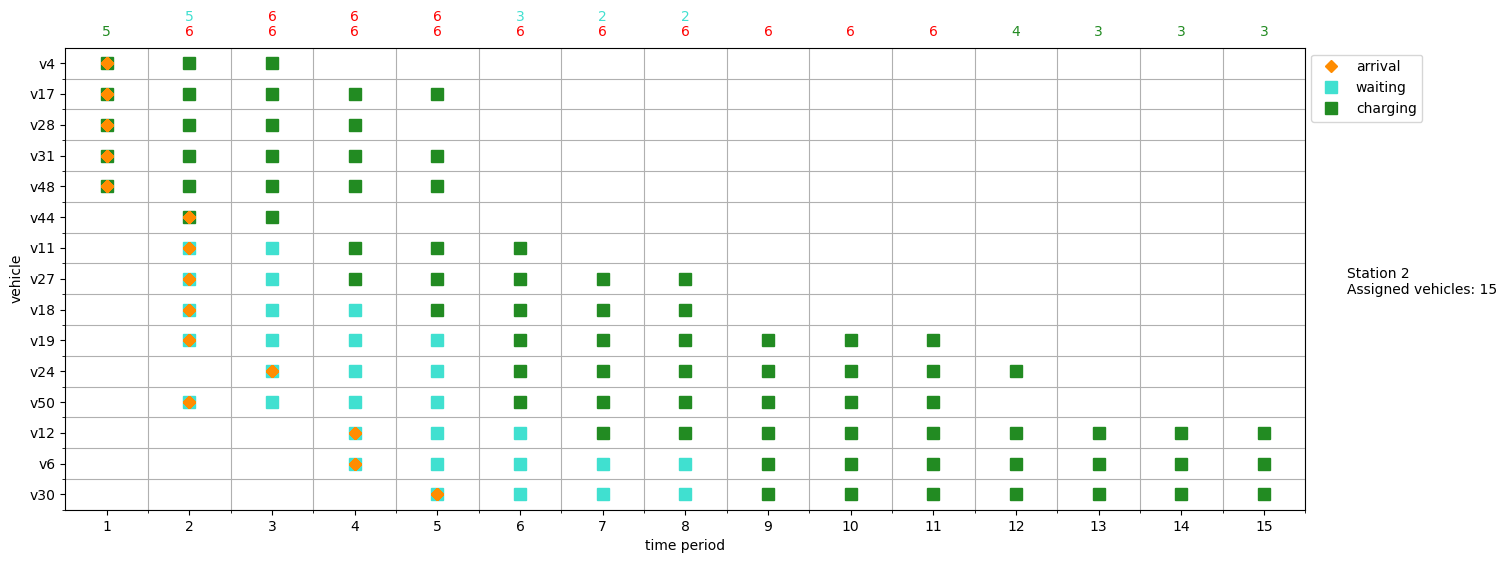

In [17]:
plot_scheduling_s(2)

In [ ]:
costs_z = {s:{v:cd*d[v,s]+cc*p[v,s] if d[v,s] <= r[v] else 270*(cd+cc) for v in V} for s in S}


In [ ]:
mod_costs_z = {s:{v:100*costs_z[s][v] for v in V} for s in S}
plt.hist(mod_costs_z[1].values())

In [ ]:
stations, infeasible, objScheduling, sample_vehic = scheduling(y,V,S,T,p,k,a,r,d,cd,cc,sample_vehic,FIFO=1,output=1,write=1)

In [ ]:
infeasible

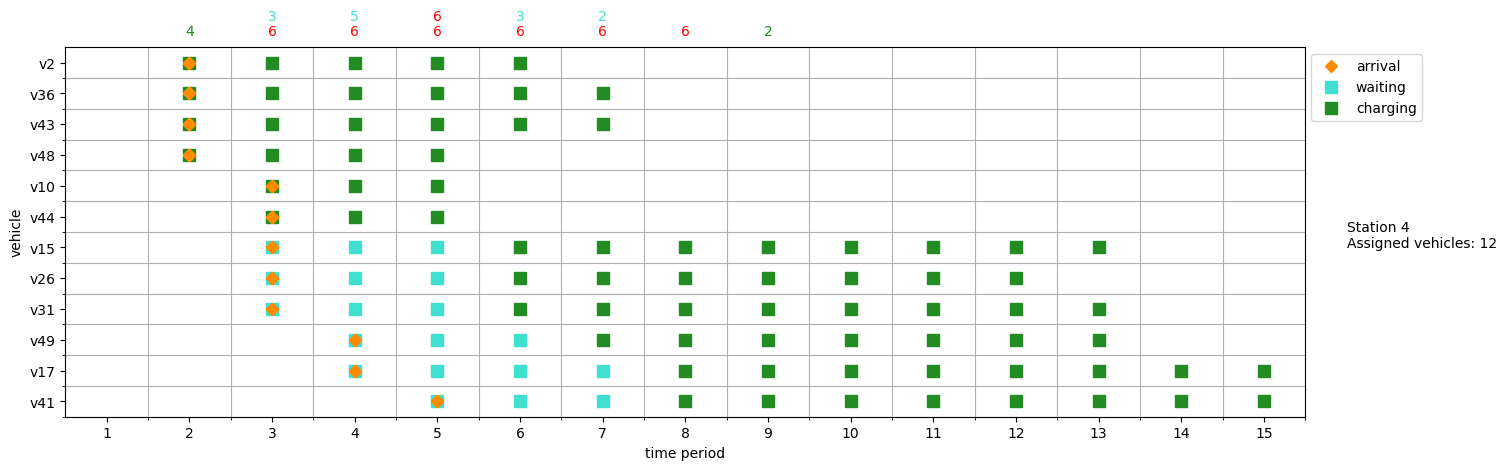

In [52]:
plot_scheduling_s(4)